# Van's K-Means Coding Basics (using Sklearn)
#### This notebook is just a simple example of running KMeans clustering with Sklearn (and graphing 3d plots). It does not delve into hyperparameter tuning or advanced KMeans techniques. Please feel free to look at the K-Means section of the clustering algorithms PPT (`Van_Clustering_Algoriths_Presentation`) if you would like a more detailed explanation of how KMeans actually works!

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Example creating a 3d Scatterplot with Iris Dataset!

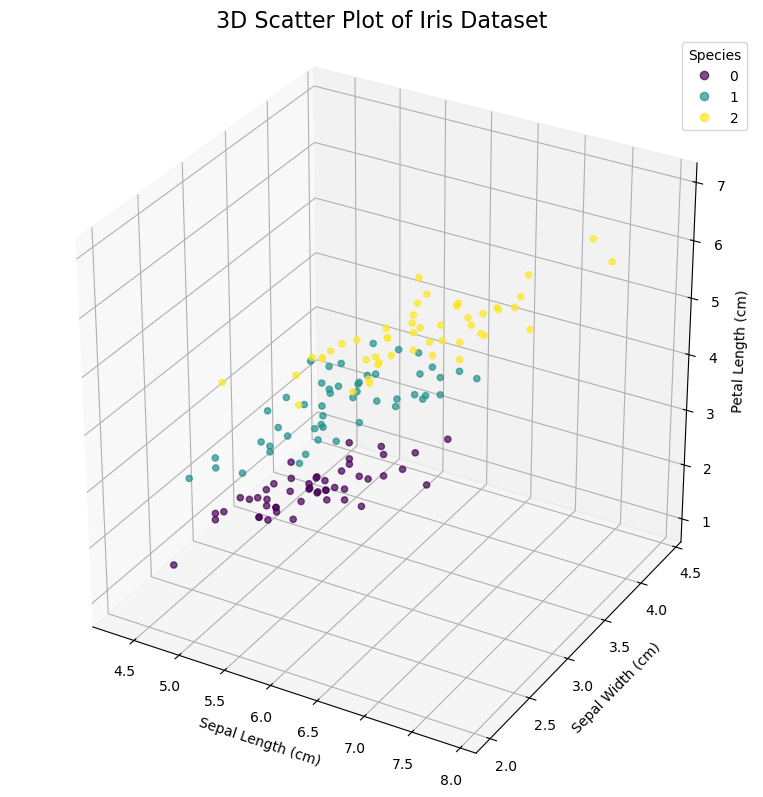

In [2]:
# Iris dataset for the example
iris = sns.load_dataset('iris')

# Creating the 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting the features
x_vals = iris['sepal_length']
y_vals = iris['sepal_width']
z_vals = iris['petal_length']
species = iris['species'] # target

# Plotting points w/ different colors based on species. 'alpha' changes the opacity of your datapoints.
scatter = ax.scatter(x_vals, y_vals, z_vals, c=pd.Categorical(species).codes, cmap='viridis', alpha=0.7)

# Adding titles/labels/legends
ax.set_title('3D Scatter Plot of Iris Dataset', fontsize=16)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.legend(*scatter.legend_elements(), title="Species")
ax.set_box_aspect([1.5, 1.5, 1.5]) # I just like adding this part to fix up my dimensions

plt.tight_layout()
plt.show()


## Creating an Elbow Graph for Kmeans (using Sklearn)
#### NOTE: If you want to learn more in detail about how K-Means or other clustering algorithms work, you can read over the clustering algorithms notes [here](https://github.com/charVANder/Useful-for-DS5110/blob/main/Useful%20Notes/Van_Clustering_Algorithms_Presentation.pdf)

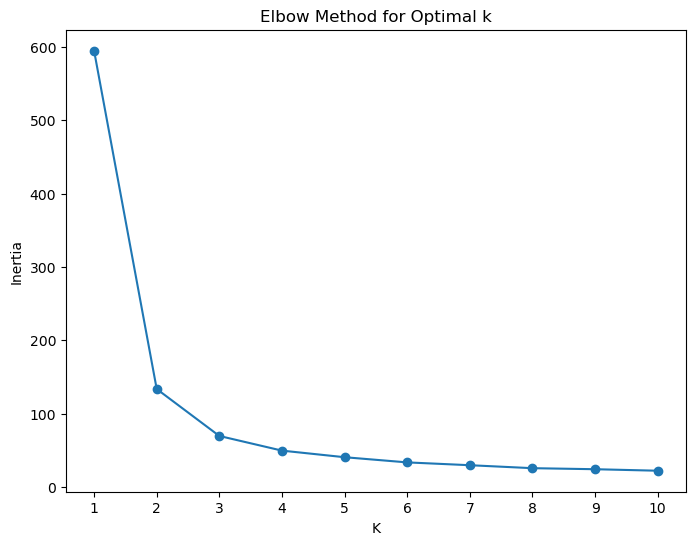

In [3]:
# Choosing features for clustering
X = iris[['sepal_length', 'sepal_width', 'petal_length']]

# Calculating inertia (also called SSE).
inertia = []
k_range = range(1, 11)  # checking for 1 to 10 clusters--this can be whatever you want to test
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42) # using sklearn
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # sklearn makes it easy to get the sse!

# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.show()

#### From the elbow graph, you usually choose the optimal K where the inertia starts to decrease more slowly. It's basically where you see the "dip" or "elbow" point in the graph. The iris dataset is very simple, so it's easy to see the elbow point at K=3. Not all datasets will be this easy. In those cases, you usually want to make use of other techniques to evaluate your cluster quality alongside the elbow graph. `Silhouette Score`, `Rand Index`, `Davies-Bouldin Index`, and `Calinski-Harabasz Index` are a few examples--all of which can be done in a single line of code if you are using Sklearn imports!

## K=3 is optimal in our case, so now we can go ahead with K=3 as one of the hyperparameters
#### Note: Sklearn has MANY other hyperparameters you can use here other than n_clusters or random_state. These include specific kmeans algorithms, initialization methods, and etc. All of these are basically more advanced ways to hypertune your parameters and create the best possible model for your needs. This is just a simple example, so there's no need to go into that stuff yet.

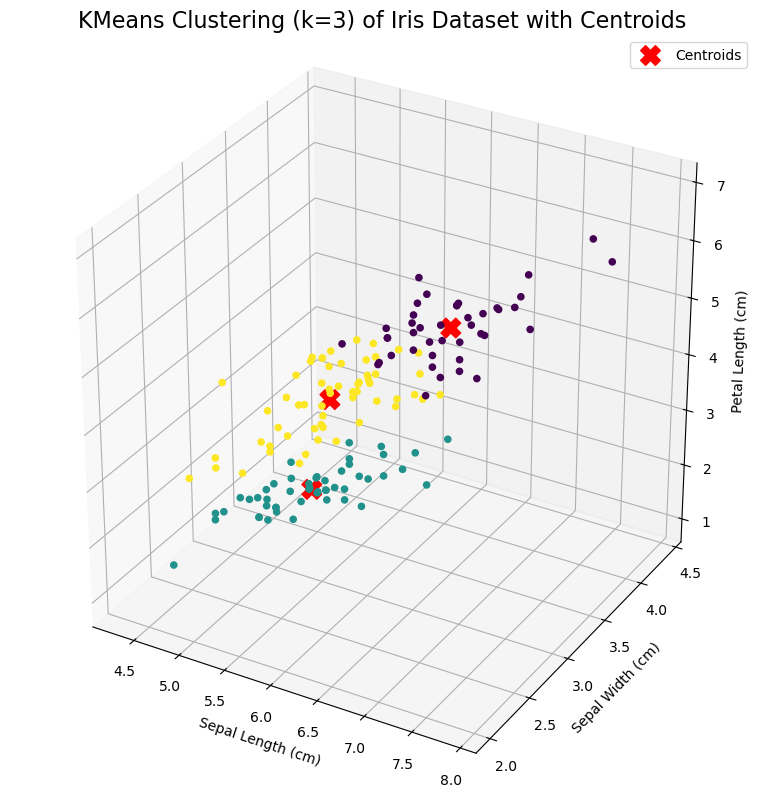

In [4]:
# Applying KMeans w/ optimal K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

iris['kmeans_cluster'] = kmeans.labels_ # adding cluster labels is easy w/ sklearn...
centroids = kmeans.cluster_centers_ # ...and so is getting the centroids! See sklearn documentation for other methods!

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'], c=iris['kmeans_cluster'], cmap='viridis', alpha=1)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label="Centroids", alpha=1) # plotting centroids

# Adding titles/labels/legends
ax.set_title('KMeans Clustering (k=3) of Iris Dataset with Centroids', fontsize=16)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_box_aspect([1.5, 1.5, 1.5])
ax.legend()

plt.tight_layout()
plt.show()


#### As mentioned earlier, you can use evaluation metrics to measure the quality of your clusters! It's usually very easy if using something like Sklearn, but it's always good to read up on what each metric does specifically. Silhouette Score is one of the most commonly used evaluation metrics. It's basically a measure of how similar each point is to its own cluster( cohesiveness) compared to other clusters (how well-separated). It usually ranges from -1 to 1, where 1 means that the points are well-clustered and -1 means that the points might have been assigned to the wrong cluster (bad).

In [5]:
# Calculating Silhouette Score to get clustear quality
result = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {result}")

Silhouette Score: 0.5498955810221874
